In [135]:

#import necessary libraries
import os
import sys
import time

import requests
import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



OS:

>This module provides a portable way of using operating system-dependent functionality. It is commonly used for tasks such as manipulating file paths and directories.

SYS:

> This module provides access to some variables used or maintained by the Python interpreter and to functions that interact strongly with the interpreter.

TIME: 

>This module provides various time-related functions. It is often used for measuring the execution time of code or for pausing execution.

REQUESTS

> This library allows you to send HTTP requests easily. It is commonly used for accessing web APIs or fetching web pages.

DATETIME:

> This module supplies classes for manipulating dates and times. It is useful for working with timestamps and date-related calculations.

PANDAS:

> This library provides data structures and functions for data manipulation and analysis. It is widely used for tasks such as reading and writing data, cleaning, transforming, and analyzing data.

MATPLOT:

> This module provides a MATLAB-like plotting framework. It is commonly used for creating various types of plots and visualizations.

SEABORN:

> This library is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. It is often used for creating complex visualizations with fewer lines of code.

WARNING

> This module provides functions for issuing warning messages. It is often used to control the display of warning messages in code.

sklearn.model_selection:

> This module provides functions for splitting data into training and testing sets, as well as cross-validation.

sklearn.linear_model.LinearRegression:

> This class implements linear regression models. It is commonly used for building linear regression models, which are used to predict a continuous target variable based on one or more input features.

sklearn.ensemble.RandomForestRegressor:

> This class implements a random forest regressor, which is an ensemble learning method based on decision trees. It is commonly used for building regression models that can handle both linear and nonlinear relationships between features and target variables.

sklearn.model_selection.GridSearchCV:

> This class performs an exhaustive search over a specified parameter grid for an estimator. It is commonly used for hyperparameter tuning.

sklearn.neighbors.KNeighborsRegressor:

> This class implements k-nearest neighbors regression, a non-parametric method used for regression tasks. It predicts the target variable by averaging the values of its k nearest neighbors.

sklearn.metrics.mean_squared_error:

> This function calculates the mean squared error (MSE) between the actual and predicted values of the target variable. It is commonly used as a performance metric for regression models.

In [136]:
#import the data
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')




These datasets are now stored as pandas DataFrame objects. 


                                                    DATA EXPLORATION

In [137]:

Train.shape, Test.shape

((4809, 23), (1601, 22))

Our dataset has a combined 6410 rows 

Train data comprising 4809 rows and 23  columns.

Test data comprising 1601 rows and 22  rows.

>Total cost is missing inour test data since its the target variable.

In [138]:

#check the first few rows of the data
Train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [139]:
Test.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [140]:

# For Train dataset
missing_values_train = Train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print("Missing values in Train dataset:")
print(missing_values_train)

# For Test dataset
missing_values_test = Test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("\nMissing values in Test dataset:")
print(missing_values_test)


Missing values in Train dataset:
travel_with        1114
total_female          3
total_male            5
most_impressing     313
dtype: int64

Missing values in Test dataset:
travel_with        327
total_female         1
total_male           2
most_impressing    111
dtype: int64


#MISSING VALUES

The numbers represent the count of missing values in each column.

>There are 327 missing values in the travel_with column, 111 missing values in the most_impressing column and total tourists are 3in Test data.

Train data
>travel with has 1114 ,female 3 andmale 5 and 313 in most impressing.

#Some of reaons we need to handle missing values:
> 1.Prevents Biased Results: 

            If missing values are not handled properly, they can bias the model towards the most common class or category, leading to incorrect predictions.

>2.Improves Model Performance:

          Missing values can introduce noise and reduce the quality of predictions. By handling missing values effectively, you can improve the performance of the model.

>3. Maintains Data Integrity:

          Missing values can lead to errors in data analysis and interpretation. Handling missing values ensures that the data used for analysis is complete and accurate. 

>Avoids Data Loss:
         Simply removing rows or columns with missing values can result in significant loss of data, especially if the missing values are spread across multiple columns. Handling missing values allows you to retain more data and make better use of available information.

In [141]:
#we want to differentiate the numerical and categorical columns
categorical_columns = Train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = Train._get_numeric_data().columns.tolist()
print(categorical_columns)
print(numerical_columns)

['ID', 'country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing']
['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']


we observe that we have 18 categorical columns.

we also have 5 numerical columns

>we wanna manually check on numerical to fully ascertain .

Which when we check we ascertain to be true.

>Tf and Tm counts members present based on gender.

>night Zanzibar and night mainland counts nights spents on the locations.

>total cost amounts amount spent during the whole tourism activity.

In [142]:

#mean of total cost
Train['total_cost'].mean()


8114388.777617799

In [143]:

# Count of countries above the mean total cost
country_count_above_mean = len(Train[Train['total_cost'] > Train['total_cost'].mean()]['country'].unique())

print(country_count_above_mean)


69


We have 69 out of 118 countries spending above mean

In [144]:

print(min(Train['total_cost']))
print(max(Train['total_cost']))
print(Train['total_cost'].mean())

49000.0
99532875.0
8114388.777617799


They is a huge disparity between the highest tourist expenditure at tshs 995322875 and lowest at 49000.

>the data hence will be a two long tailed around the mean.

In [145]:

#median of total cost
Train['total_cost'].median()

3397875.0

  Median is lower than mean
  >this clearly means total cost is positively skewed distribution

The tail of the distribution will be  extended towards the higher values.
Most of the data points are concentrated on the lower end, with fewer extreme values on the higher end.
Given that the mean is higher than the median, and the data ranges from a relatively low value (49,000) to a significantly high value (99,000,000), it indicates a positively skewed distribution. This type of distribution is common in these scenarios like expenditure distribution, where a few individuals earn very high incomes, resulting in a longer tail on the higher end of the distribution.
  

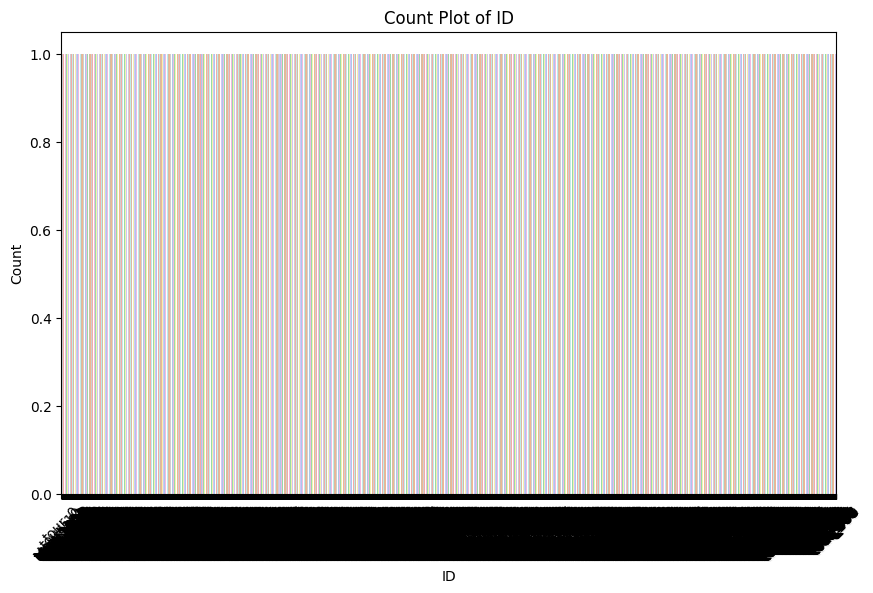

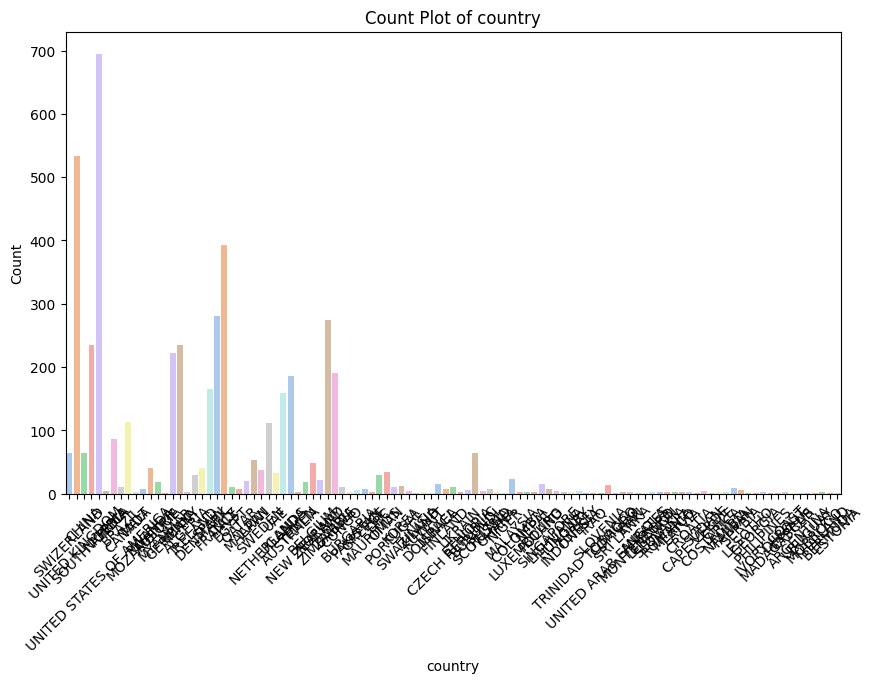

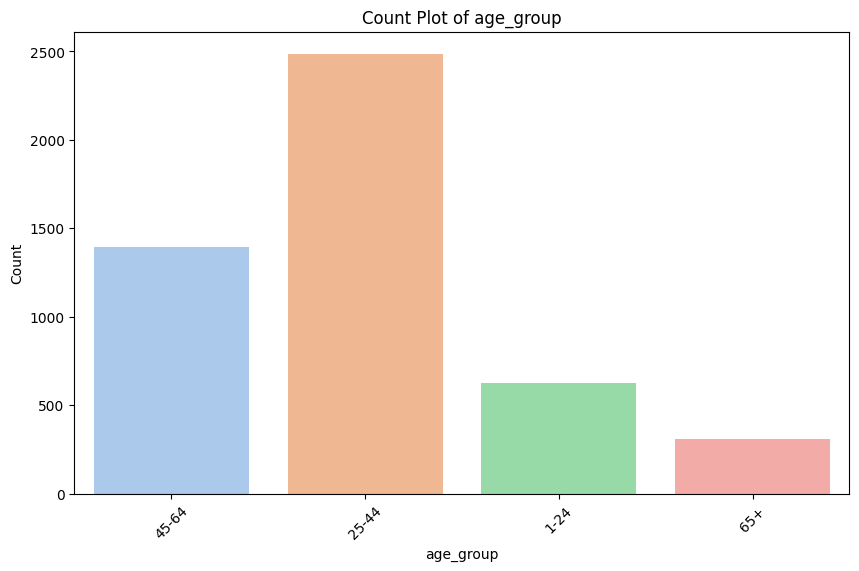

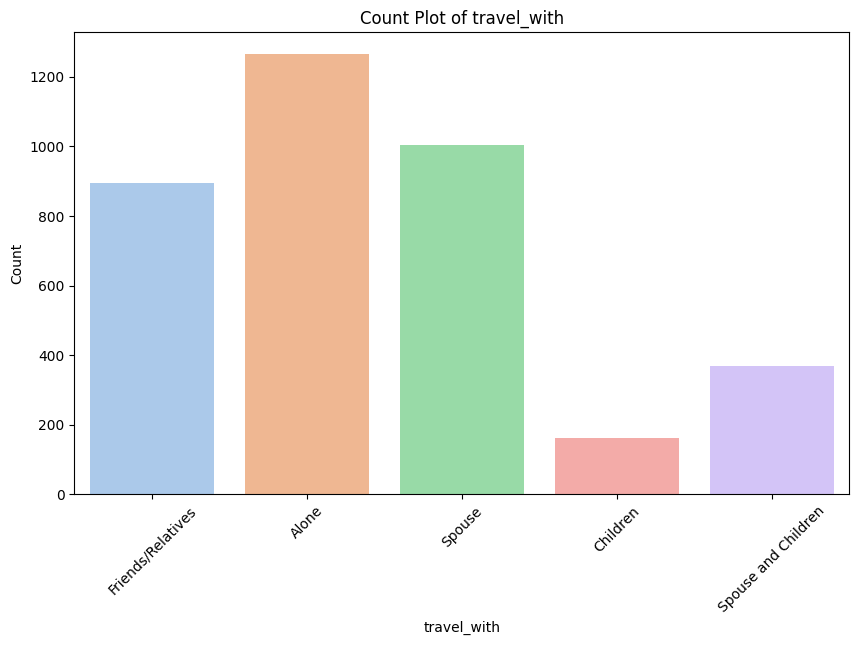

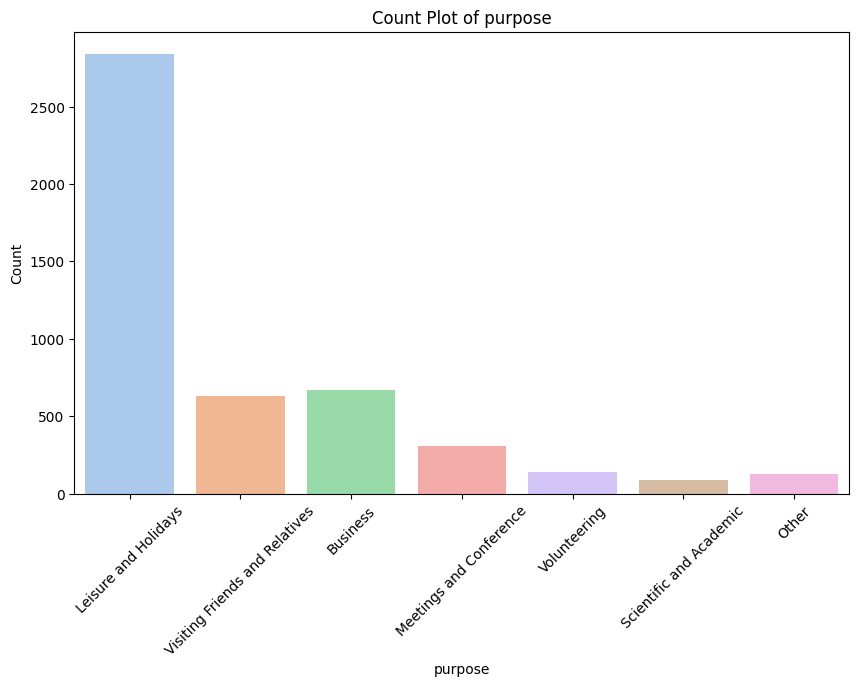

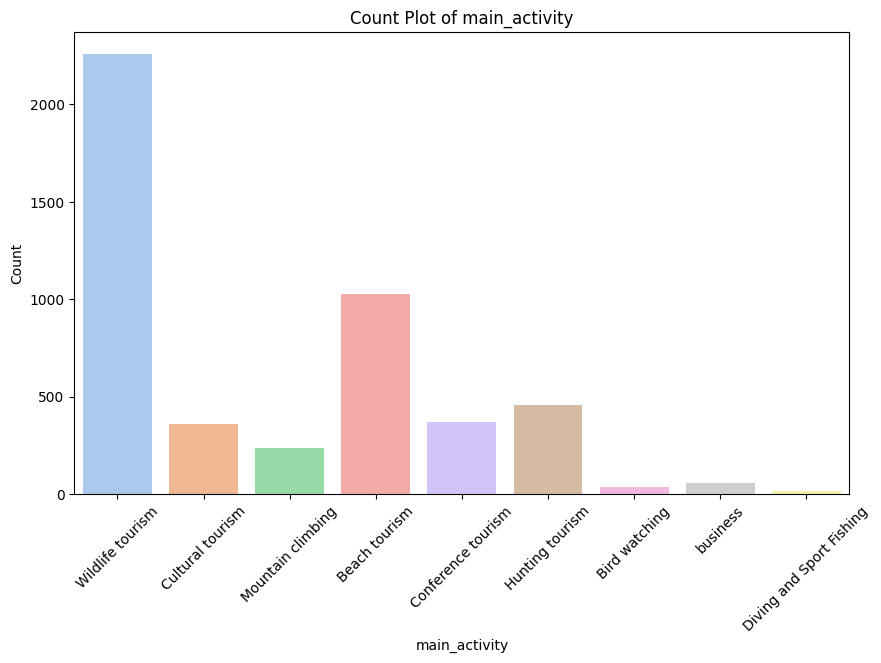

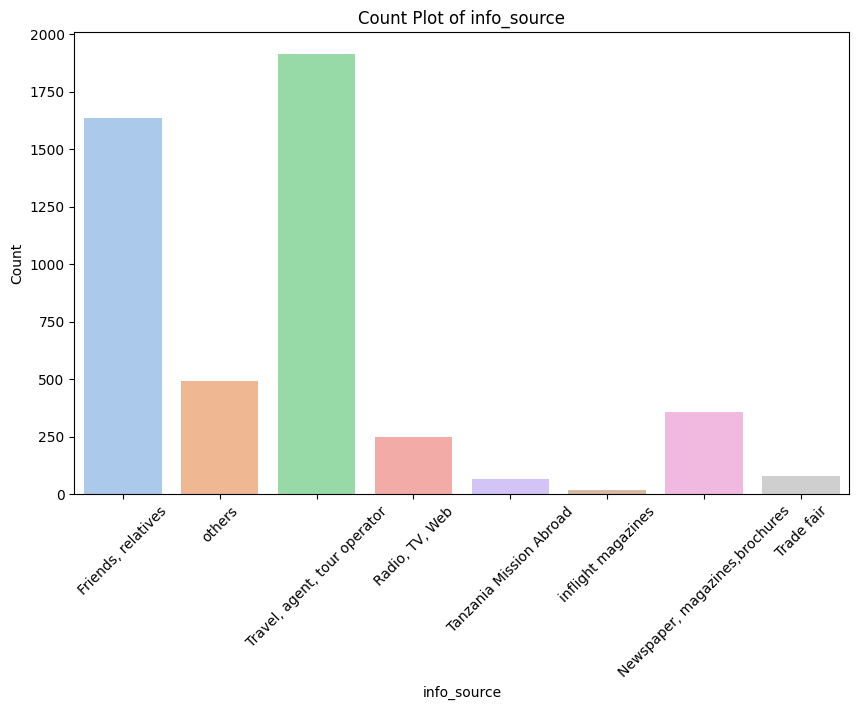

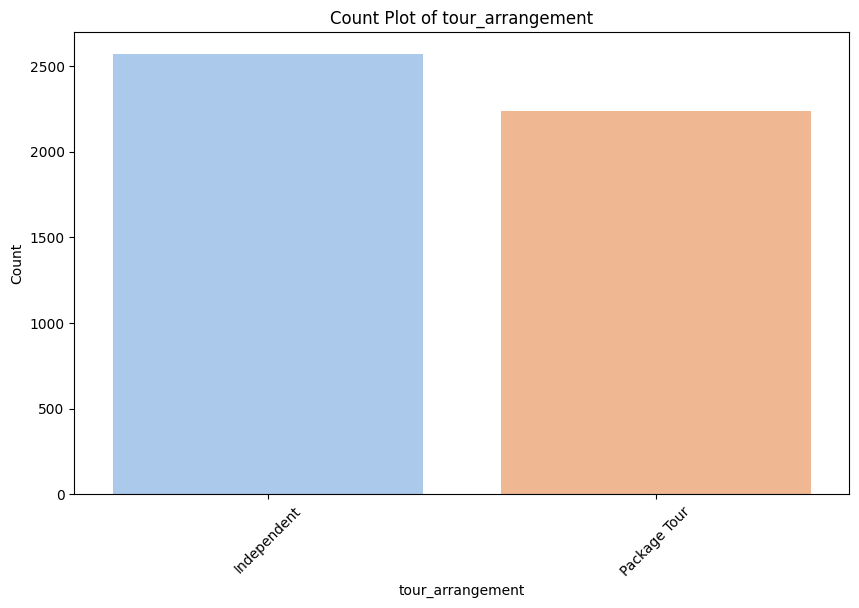

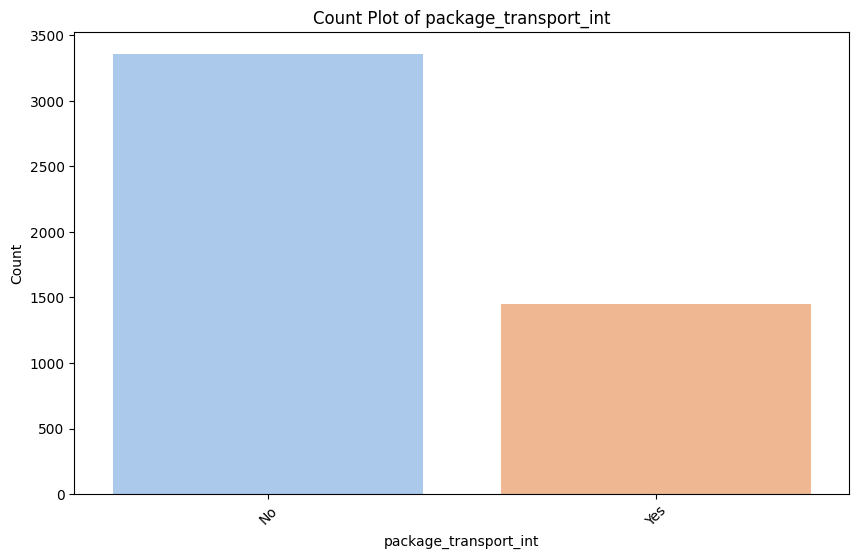

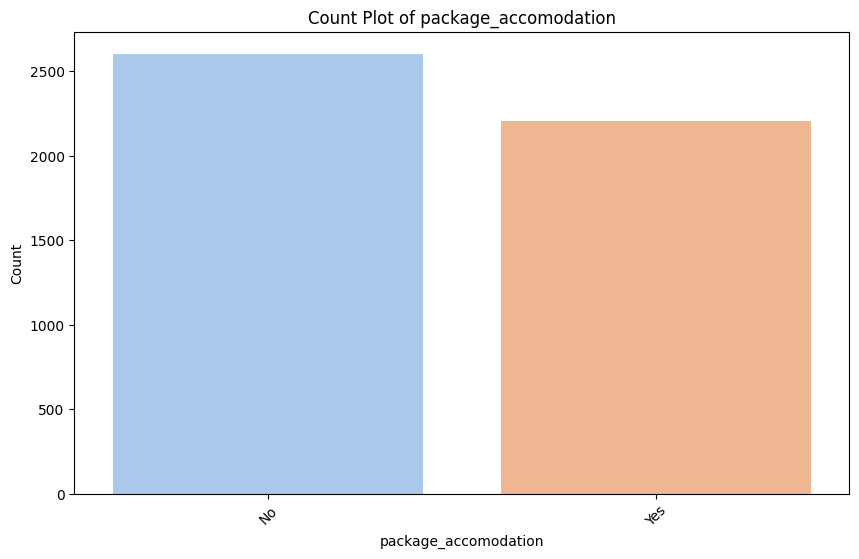

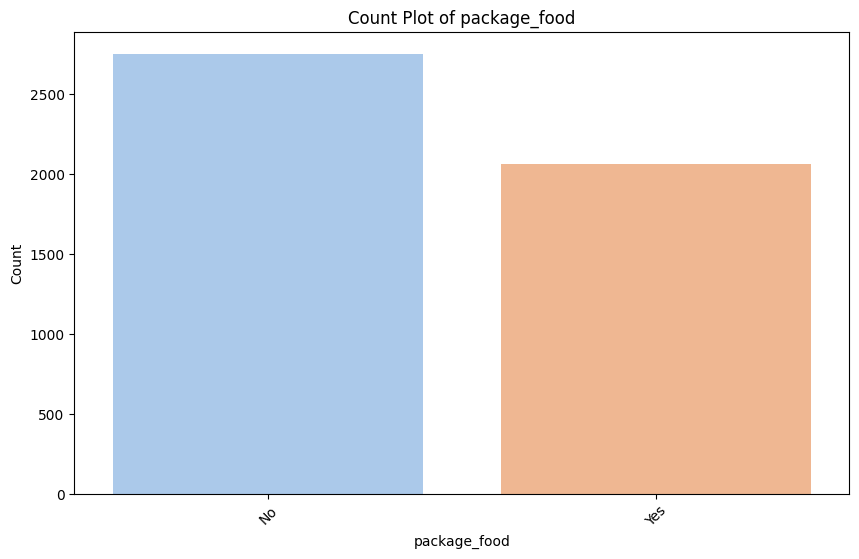

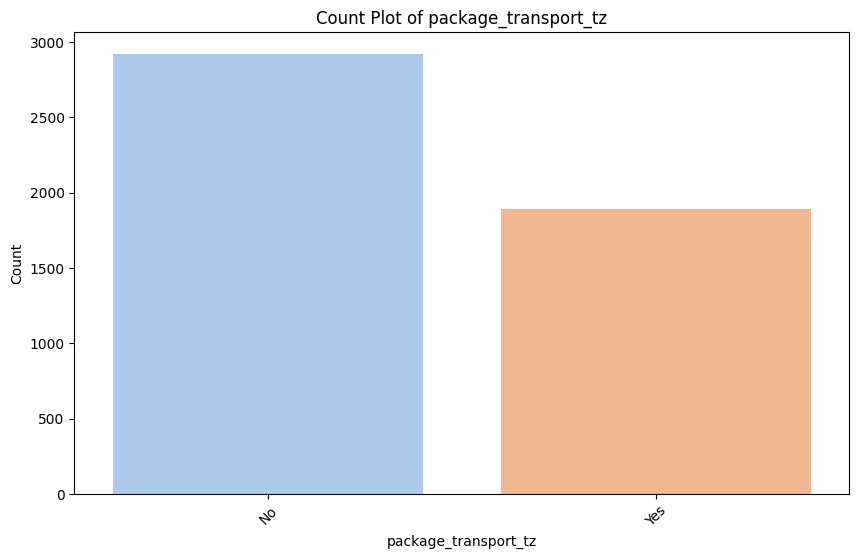

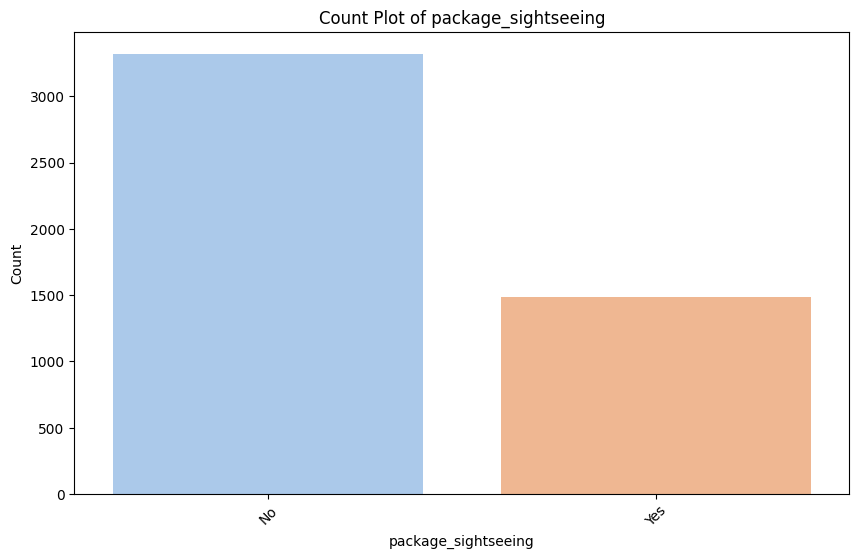

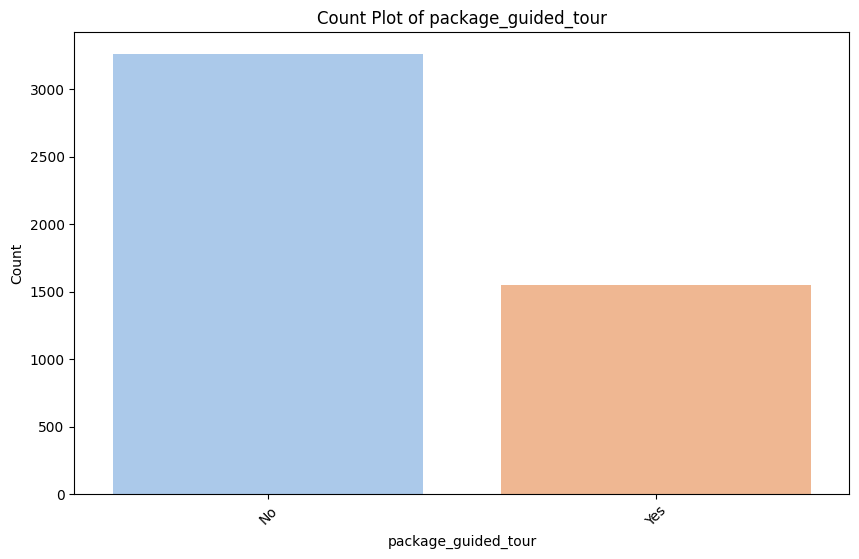

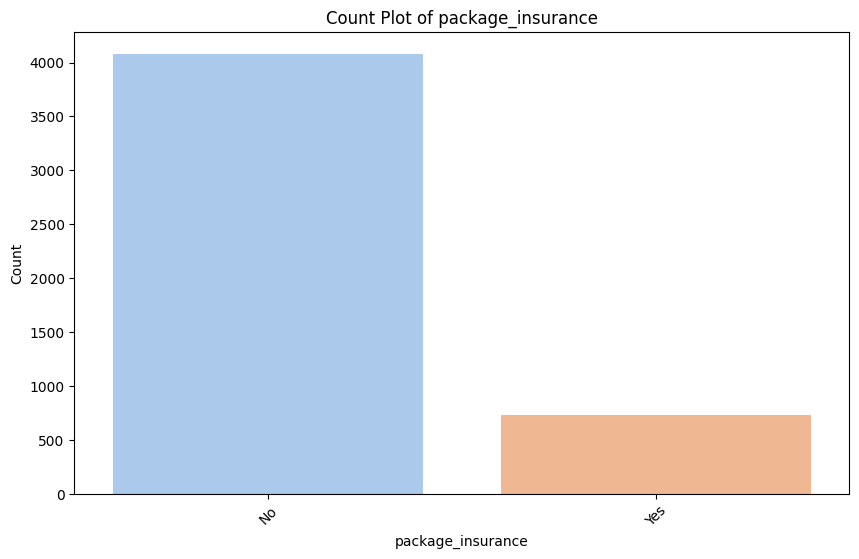

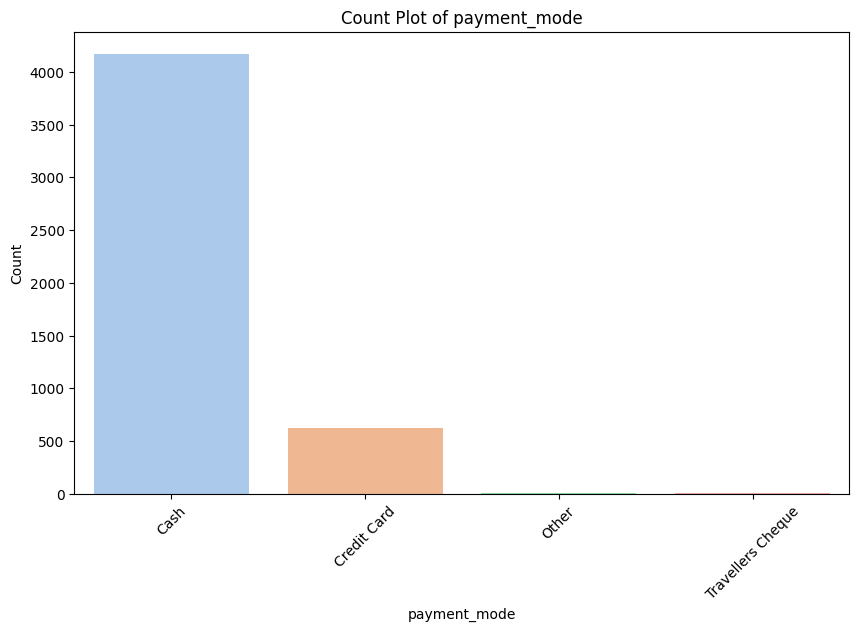

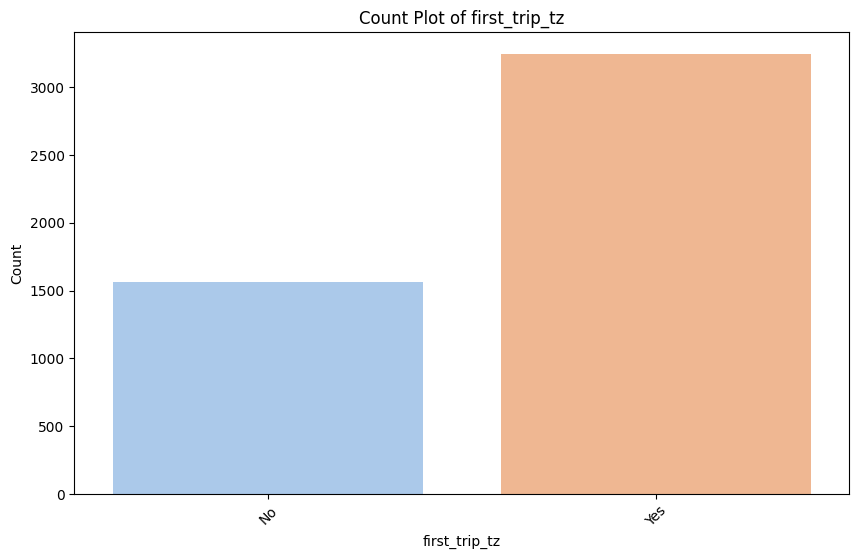

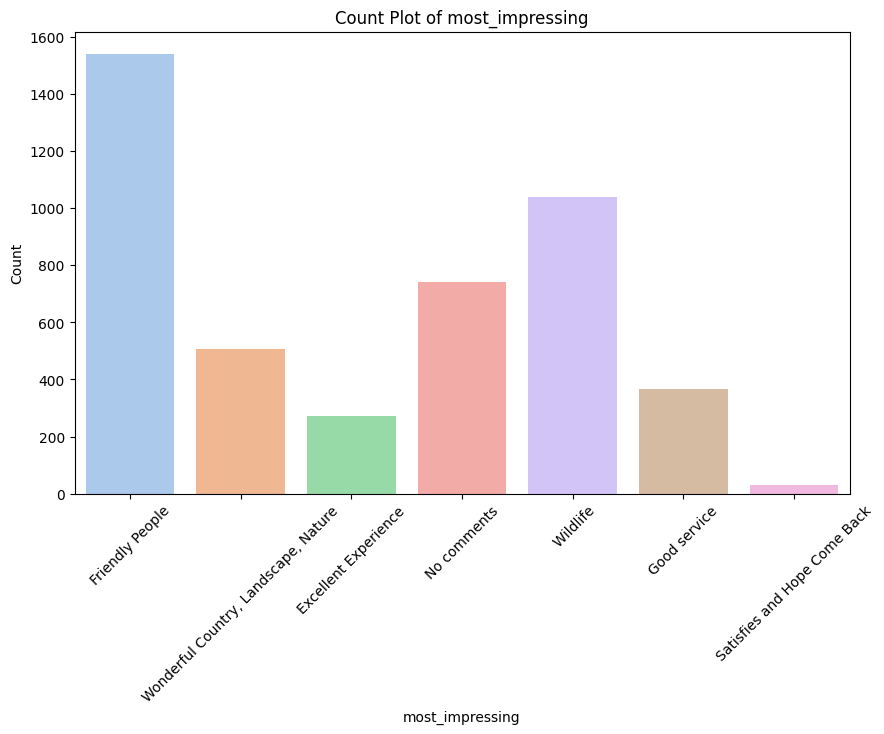

In [146]:




# Plot count plots for categorical variables
categorical_vars = Train.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=Train, x=var, palette='pastel')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


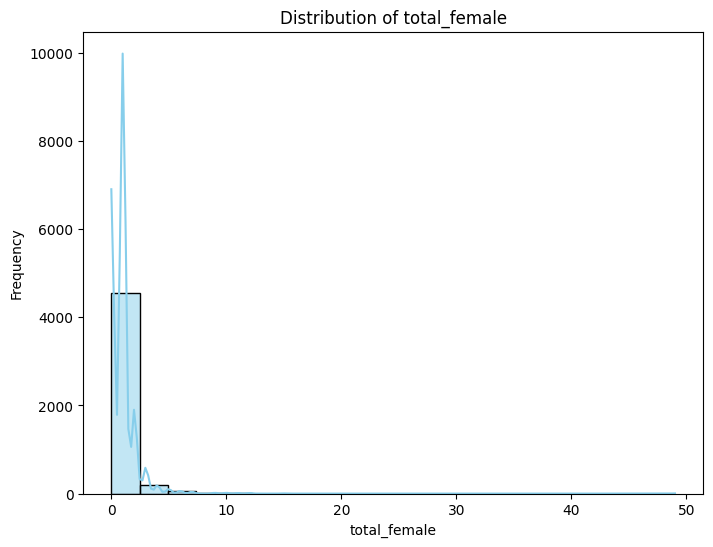

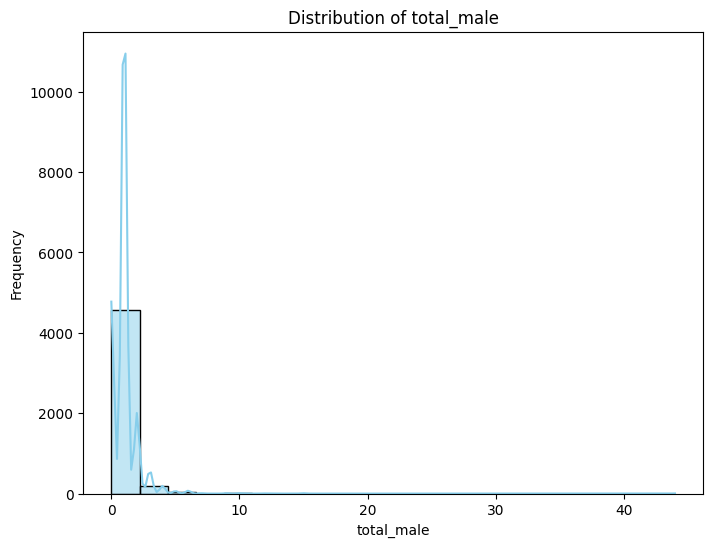

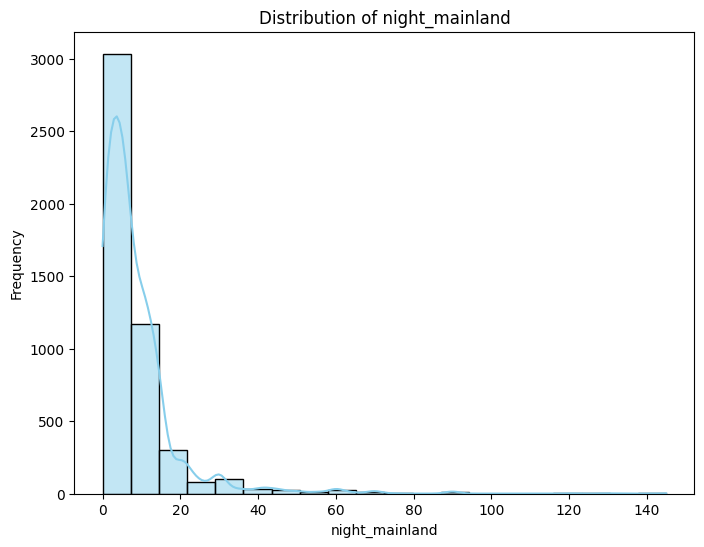

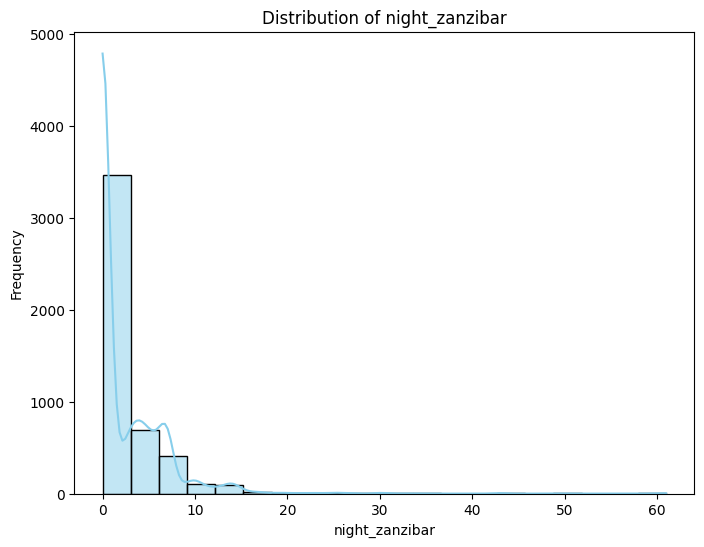

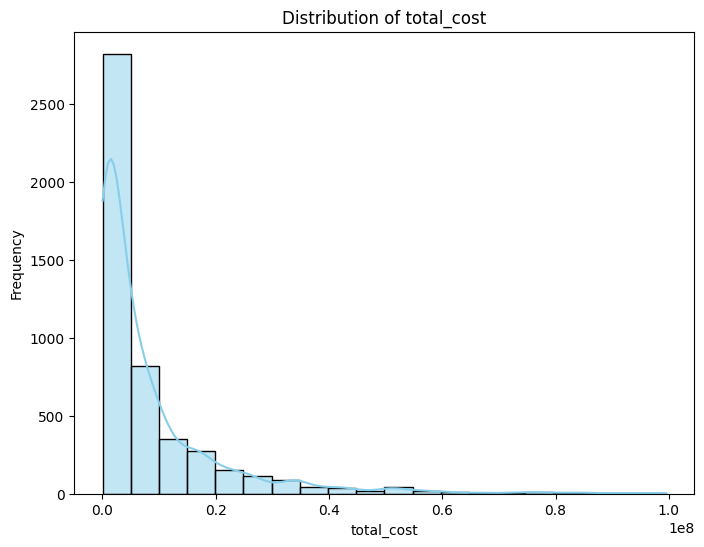

In [147]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables
numerical_vars = Train.select_dtypes(include=['int64', 'float64']).columns
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(Train[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()



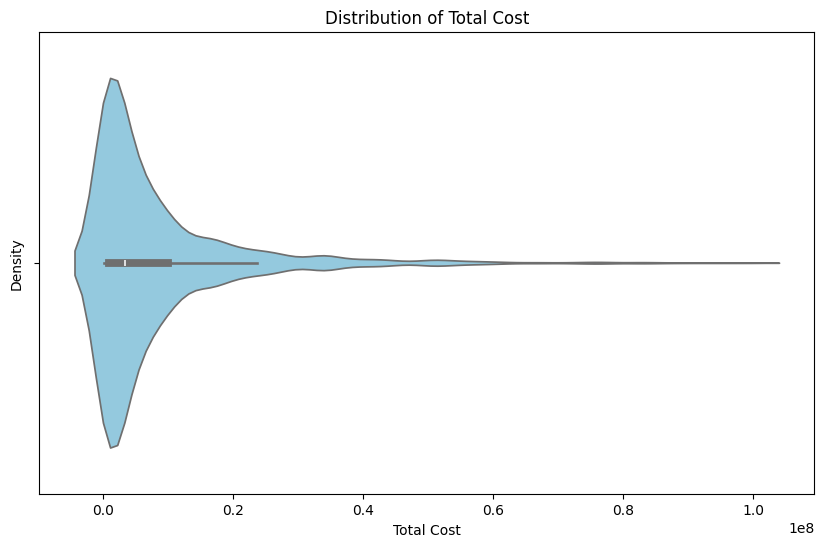

In [148]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='total_cost', data=Train, color='skyblue')

# Add title and labels
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Density')

# Show plot
plt.show()


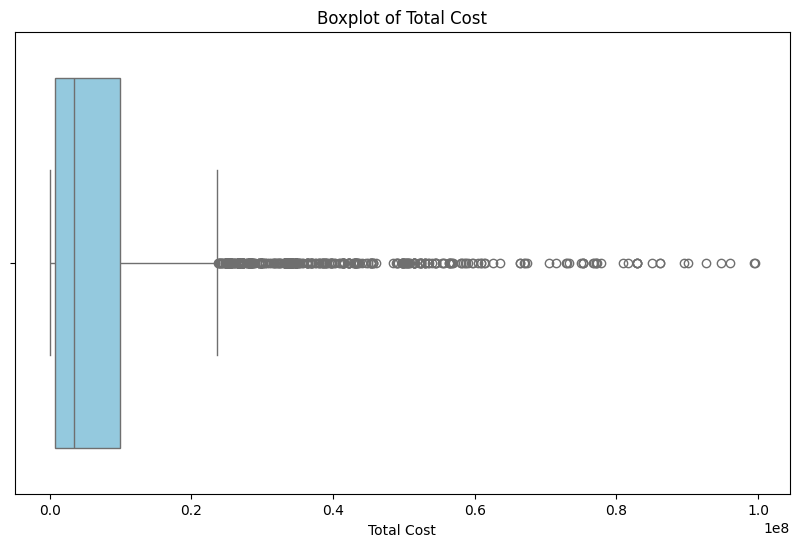

In [149]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_cost', data=Train, color='skyblue')

# Add title and labels
plt.title('Boxplot of Total Cost')
plt.xlabel('Total Cost')

# Show plot
plt.show()



#DATA PREPROCESSING.


#
Missing Values data preprocessing;

1.'travel_with':

> This is a categorical variable indicating who the tourist is traveling with
 we can replace missing values with a new category such as 'Unknown'
 to retain the information that the data is missing.

2.'total_female' and 'total_male':

> These variables represent counts of females and males in the tourist group.
 Since the number of missing values is small compared to the total dataset size,
 we can impute the missing values with the median of each respective column.

3.'most_impressing':

> This column represents what impressed the tourist the most during the trip.
 We can replace missing values with a new category like 'Not specified'
 to retain the information that data is missing.

4.'total_cost':

> This is our target variable. Rows with missing 'total_cost' cannot be used for training our model.
 Therefore, we will need to remove these rows from the training dataset.

In [150]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing'
Train['travel_with'].fillna('Unknown', inplace=True)
Train['total_female'].fillna(Train['total_female'].median(), inplace=True)
Train['total_male'].fillna(Train['total_male'].median(), inplace=True)
Train['most_impressing'].fillna('Not specified', inplace=True)

# Step 2: Removing rows with missing 'total_cost' (target variable)
Train.dropna(subset=['total_cost'], inplace=True)

# Check if missing values are handled
#print("Missing values in the training dataset after handling:")
print(Train.isnull().sum())


In [151]:
#check for missing values
#Train.isnull().sum()
print(Train.isnull().sum())


ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64


In [152]:

#check for missing values
Test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [153]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing' in the test set
Test['travel_with'].fillna('Unknown', inplace=True)
Test['total_female'].fillna(Test['total_female'].median(), inplace=True)
Test['total_male'].fillna(Test['total_male'].median(), inplace=True)
Test['most_impressing'].fillna('Not specified', inplace=True)

# Check if missing values are handled in the test set
print("Missing values in the test dataset after handling:")
print(Test.isnull().sum())


Missing values in the test dataset after handling:
ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64



# Our new data is free of any missing values

In [154]:

Train.describe()#summary statistics of the data

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926804,1.009565,8.488043,2.304429,8.114389e+06
std,1.287841,1.138273,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [155]:

#check for duplicates
df.duplicated().sum()

0

In [156]:

# Check for unique values in the 'country' column
df['country'].nunique()


118

we have tourist from 118 countries.

>we ascertain country is a key variable in our dataset as expenditure will
 be not linearly distributed due to different purchasing power amongst different visitors.
 

#one hot encoding

Maintains Independence: One-hot encoding preserves the independence of categorical variables. Each category is represented by its own binary feature, ensuring that no ordinal relationship is assumed between categories.

In [157]:


from sklearn.preprocessing import OneHotEncoder

# Define the threshold for low cardinality
threshold = 10  # For example, you can start with a threshold of 10

# Identify categorical columns with low cardinality
low_cardinality_cols = [col for col in Train.columns if Train[col].nunique() < threshold]

# Initialize one-hot encoder with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit one-hot encoder on the training data
one_hot_encoder.fit(Train[low_cardinality_cols])


OneHotEncoder(drop='first', handle_unknown='ignore')

In [158]:
from sklearn.preprocessing import OneHotEncoder

# Initialize one-hot encoder with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit one-hot encoder on the training data
one_hot_encoder.fit(Train[low_cardinality_cols])

# Transform both training and test data
one_hot_encoded_cols_train = pd.DataFrame(one_hot_encoder.transform(Train[low_cardinality_cols]).toarray())
one_hot_encoded_cols_test = pd.DataFrame(one_hot_encoder.transform(Test[low_cardinality_cols]).toarray())

# Get the column names for one-hot encoded features
one_hot_encoded_feature_names = one_hot_encoder.get_feature_names_out(low_cardinality_cols)

# Assign column names to the one-hot encoded dataframes
one_hot_encoded_cols_train.columns = one_hot_encoded_feature_names
one_hot_encoded_cols_test.columns = one_hot_encoded_feature_names

# Drop original categorical columns from both training and test data
Train.drop(columns=low_cardinality_cols, inplace=True)
Test.drop(columns=low_cardinality_cols, inplace=True)

# Concatenate one-hot encoded columns with the respective datasets
Train = pd.concat([Train, one_hot_encoded_cols_train], axis=1)
Test = pd.concat([Test, one_hot_encoded_cols_test], axis=1)

# Check the updated datasets
print("Updated training dataset:")
print(Train.head())
print("\nUpdated test dataset:")
print(Test.head())



Updated training dataset:
          ID         country  total_female  total_male  night_mainland  \
0     tour_0      SWIZERLAND           1.0         1.0            13.0   
1    tour_10  UNITED KINGDOM           1.0         0.0            14.0   
2  tour_1000  UNITED KINGDOM           0.0         1.0             1.0   
3  tour_1002  UNITED KINGDOM           1.0         1.0            11.0   
4  tour_1004           CHINA           1.0         0.0             7.0   

   night_zanzibar  total_cost  age_group_25-44  age_group_45-64  \
0             0.0    674602.5              0.0              1.0   
1             7.0   3214906.5              1.0              0.0   
2            31.0   3315000.0              1.0              0.0   
3             0.0   7790250.0              1.0              0.0   
4             4.0   1657500.0              0.0              0.0   

   age_group_65+  ...  payment_mode_Other  payment_mode_Travellers Cheque  \
0            0.0  ...                 0.0        

#MORE INSIGHTS ONE-HOT ENCODER.

OneHotEncoder used to encode categorical variables into numerical values. This encoder is commonly used in machine learning pipelines to handle categorical data, which are variables that can take on one of a limited, and usually fixed, number of possible values.

Here's how OneHotEncoder typically works:

Input: It takes categorical variables as input. These variables could be countries, age groups, travel companions, payment modes, or impressions as is in dataset.

Encoding: For each categorical variable, OneHotEncoder creates a new binary column for each category in that variable. For example, if the variable is "country" and there are unique countries: "Australia", "Canada", and "Germany", it will create three binary columns: "country_Australia", "country_Canada", and "country_Germany".

Binary Representation: In each binary column, it assigns a value of 1 if the observation falls into that category, and 0 otherwise. This binary representation helps machine learning algorithms effectively understand and utilize categorical data.

Handle Unknown Categories: Optionally, OneHotEncoder can be configured to handle unknown categories that might appear in the test set but not in the training set. It can either ignore them or raise an error, depending on the configuration.

Drop First: Another option is to drop the first category for each feature. This is useful to avoid multicollinearity in linear models.

Output: The output of OneHotEncoder is a sparse matrix or an array of binary values representing the encoded categorical variables, which can then be used as input to machine learning models.



In [159]:

Train.shape

(4809, 55)

In [174]:
#data types
Train.dtypes

ID                                                       object
country                                                  object
total_female                                            float64
total_male                                              float64
night_mainland                                          float64
night_zanzibar                                          float64
total_cost                                              float64
age_group_25-44                                         float64
age_group_45-64                                         float64
age_group_65+                                           float64
travel_with_Children                                    float64
travel_with_Friends/Relatives                           float64
travel_with_Spouse                                      float64
travel_with_Spouse and Children                         float64
travel_with_Unknown                                     float64
purpose_Leisure and Holidays            

In [160]:
#columns in the data
Train.columns

Index(['ID', 'country', 'total_female', 'total_male', 'night_mainland',
       'night_zanzibar', 'total_cost', 'age_group_25-44', 'age_group_45-64',
       'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'travel_with_Unknown',
       'purpose_Leisure and Holidays', 'purpose_Meetings and Conference',
       'purpose_Other', 'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'i

Our categoreis have increased from 23 to 55 variables

#FEATURE ENGINEERING

In [176]:

# Combine gender features to create a new feature representing total tourists
Train['total_tourists'] = Train['total_female'] + Train['total_male']

# Drop the individual gender columns
Train.drop(['total_female', 'total_male'], axis=1, inplace=True)


In [177]:

Train.dtypes

ID                                                       object
country                                                  object
night_mainland                                          float64
night_zanzibar                                          float64
total_cost                                              float64
age_group_25-44                                         float64
age_group_45-64                                         float64
age_group_65+                                           float64
travel_with_Children                                    float64
travel_with_Friends/Relatives                           float64
travel_with_Spouse                                      float64
travel_with_Spouse and Children                         float64
travel_with_Unknown                                     float64
purpose_Leisure and Holidays                            float64
purpose_Meetings and Conference                         float64
purpose_Other                           

# TOTAL female+male=total_tourists.

Combining gender into a single feature could simplify the model and reduce dimensionality, especially THAT there's strong correlation or interaction between total_female and total_male.
>Identifying highly correlated features is important because they can introduce multicollinearity issues in predictive models. In this case, total_female and total_male are highly correlated, which means including both of them in a predictive model might not provide much additional information and could potentially lead to instability in the model estimates


In [ ]:

# Combine gender features to create a new feature representing total tourists
Test['total_tourists'] = Test['total_female'] + Train['total_male']

# Drop the individual gender columns
Test.drop(['total_female', 'total_male'], axis=1, inplace=True)



In [178]:

from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = ['night_mainland', 'night_zanzibar']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
Train_scaled = Train.copy()
Train_scaled[numerical_features] = scaler.fit_transform(Train[numerical_features])


In [179]:



# Assuming 'Train' is your DataFrame containing numerical features
numerical_columns = Train.select_dtypes(include=['number']).columns
skewness = Train[numerical_columns].skew()

# Display skewness for each numerical feature
print("Skewness for each numerical feature:")
print(skewness)


Skewness for each numerical feature:
night_mainland                                           4.026044
night_zanzibar                                           4.226719
total_cost                                               2.967848
age_group_25-44                                         -0.068683
age_group_45-64                                          0.929907
age_group_65+                                            3.569403
travel_with_Children                                     5.170757
travel_with_Friends/Relatives                            1.613529
travel_with_Spouse                                       1.431974
travel_with_Spouse and Children                          3.187026
travel_with_Unknown                                      1.272547
purpose_Leisure and Holidays                            -0.368444
purpose_Meetings and Conference                          3.534209
purpose_Other                                            5.883813
purpose_Scientific and Academic        

In [184]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
categorical_features = Train.select_dtypes(include=['object'])
# Perform one-hot encoding or label encoding for categorical features

# Separate numerical features
numerical_features = Train.select_dtypes(include=['float64', 'int64'])

# Apply skewness correction to numerical features
skewness_before = numerical_features.skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to reduce skewness
numerical_features_log = np.log1p(numerical_features)

# Apply StandardScaler to standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_log)

# Convert back to DataFrame
Train_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Rejoin numerical and categorical features
Train_processed = pd.concat([Train_scaled, categorical_features], axis=1)

# Check skewness after transformation
skewness_after = Train_scaled.skew()
print("Skewness after logarithmic transformation:")
print(skewness_after)


Skewness before transformation:
night_mainland                                           4.026044
night_zanzibar                                           4.226719
total_cost                                               2.967848
age_group_25-44                                         -0.068683
age_group_45-64                                          0.929907
age_group_65+                                            3.569403
travel_with_Children                                     5.170757
travel_with_Friends/Relatives                            1.613529
travel_with_Spouse                                       1.431974
travel_with_Spouse and Children                          3.187026
travel_with_Unknown                                      1.272547
purpose_Leisure and Holidays                            -0.368444
purpose_Meetings and Conference                          3.534209
purpose_Other                                            5.883813
purpose_Scientific and Academic             


>The reduction in skewness suggests that the logarithmic transformation has helped to make the distributions of these features more symmetric and closer to a normal distribution.

In [229]:


from sklearn.preprocessing import StandardScaler

# Encode categorical variables
categorical_features = Test.select_dtypes(include=['object'])
# Perform one-hot encoding or label encoding for categorical features

# Separate numerical features
numerical_features = Test.select_dtypes(include=['float64', 'int64'])

# Apply skewness correction to numerical features
skewness_before = numerical_features.skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to reduce skewness
numerical_features_log = np.log1p(numerical_features)

# Apply StandardScaler to standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_log)

# Convert back to DataFrame
Test_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Rejoin numerical and categorical features
Test_processed = pd.concat([Test_scaled, categorical_features], axis=1)

# Check skewness after transformation
skewness_after = Test_scaled.skew()
print("Skewness after logarithmic transformation:")
print(skewness_after)


Skewness before transformation:
total_female                                             5.600595
total_male                                              17.228367
night_mainland                                          23.551016
night_zanzibar                                          15.747173
age_group_25-44                                         -0.164352
age_group_45-64                                          0.985303
age_group_65+                                            3.962633
travel_with_Children                                     5.117982
travel_with_Friends/Relatives                            1.468583
travel_with_Spouse                                       1.281148
travel_with_Spouse and Children                          3.231448
travel_with_Unknown                                      1.468583
purpose_Leisure and Holidays                            -0.333382
purpose_Meetings and Conference                          3.472294
purpose_Other                               


Skewness Before Transformation:

Features like night_mainland, night_zanzibar, main_activity_Diving and Sport Fishing, payment_mode_Travellers Cheque, etc., have high positive skewness values, indicating a heavy right tail in their distributions.
Skewed distributions suggest that there may be outliers or a non-normal distribution of data in these features.

Skewness After Logarithmic Transformation:

>After applying the logarithmic transformation, the skewness of most features reduced.
Features like night_mainland, night_zanzibar, main_activity_Diving and Sport Fishing, payment_mode_Travellers Cheque, etc., still have relatively notable skewness values, but they have been notably reduced compared to their initial skewness values.
Some features, such as total_tourists, even show negative skewness after the transformation, indicating a slight left tail in their distributions.


The reduction in skewness suggests that the logarithmic transformation has helped to make the distributions of these features more symmetric and closer to a normal distribution.






In [230]:

print(Test_processed.shape)

(1601, 54)


In [231]:
# Assuming you have processed your test data and stored it in Test_processed DataFrame

# Save the processed data to a new csv file
Test_processed.to_csv('Test_processed.csv', index=False)



In [232]:
# Save the processed data to a new csv file
Test_processed.to_csv('Test_processed.csv', index=False)

In [187]:
Train_processed.to_csv('Train_processed.csv', index=False)

In [188]:
print(Train_processed.head())

   night_mainland  night_zanzibar  total_cost  age_group_25-44  \
0        0.852573       -0.727196   -0.835503        -1.034920   
1        0.925319        1.490199    0.093120         0.966258   
2       -1.199195        2.968462    0.111354         0.966258   
3        0.690036       -0.727196    0.619498         0.966258   
4        0.262514        0.989014   -0.300879        -1.034920   

   age_group_45-64  age_group_65+  travel_with_Children  \
0         1.567554      -0.261136             -0.186712   
1        -0.637937      -0.261136             -0.186712   
2        -0.637937      -0.261136             -0.186712   
3        -0.637937      -0.261136             -0.186712   
4        -0.637937      -0.261136             -0.186712   

   travel_with_Friends/Relatives  travel_with_Spouse  \
0                       2.091216           -0.514000   
1                      -0.478191           -0.514000   
2                      -0.478191           -0.514000   
3                      -

In [190]:
# Check the shape of the processed data
print("Shape of the processed data:", Train_processed.shape)

Shape of the processed data: (4809, 54)


In [ ]:

# Check the data types of the processed data
print("Data types of the processed data:")
print(Train_processed.dtypes)


Data types of the processed data:
night_mainland                                          float64
night_zanzibar                                          float64
total_cost                                              float64
age_group_25-44                                         float64
age_group_45-64                                         float64
age_group_65+                                           float64
travel_with_Children                                    float64
travel_with_Friends/Relatives                           float64
travel_with_Spouse                                      float64
travel_with_Spouse and Children                         float64
travel_with_Unknown                                     float64
purpose_Leisure and Holidays                            float64
purpose_Meetings and Conference                         float64
purpose_Other                                           float64
purpose_Scientific and Academic                         float64
purpos

In [191]:

# Check for missing values in the processed data
print("Missing values in the processed data:")
print(Train_processed.isnull().sum())


Missing values in the processed data:
night_mainland                                          0
night_zanzibar                                          0
total_cost                                              0
age_group_25-44                                         0
age_group_45-64                                         0
age_group_65+                                           0
travel_with_Children                                    0
travel_with_Friends/Relatives                           0
travel_with_Spouse                                      0
travel_with_Spouse and Children                         0
travel_with_Unknown                                     0
purpose_Leisure and Holidays                            0
purpose_Meetings and Conference                         0
purpose_Other                                           0
purpose_Scientific and Academic                         0
purpose_Visiting Friends and Relatives                  0
purpose_Volunteering              

In [192]:
#loaad data to a new csv file
Train_processed.to_csv('Train_processed.csv', index=False)


#WHY USE RMSE:

1.Easy Interpretation: RMSE is in the same unit as the target variable (total cost), making it easy to interpret. It represents the average magnitude of the errors between predicted and actual values.

2.Sensitivity to Large Errors: RMSE penalizes large prediction errors more heavily than mean absolute error (MAE).

>It provides a measure of the average magnitude of errors produced by the model in its predictions.
It penalizes large errors more than smaller ones, providing 
a more accurate representation of prediction accuracy.

>RMSE is sensitive to outliers, which makes it suitable for 
evaluating models when the target variable has skewed 
distributions.


3.Differentiability: RMSE is differentiable, which is beneficial for optimization algorithms used during model training.

4.Commonly Used: RMSE is a widely accepted and understood metric, making it easier to compare models and communicate results.

In [193]:

# Load the Train dataset
train_data = pd.read_csv("Train_processed.csv")

# Separate features (X) and target variable (y) from the Train dataset
X_train = train_data.drop(columns=['ID', 'country', 'total_cost'])
y_train = train_data['total_cost']

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)








# Evaluate models on the validation set

rf_reg_preds = rf_reg_model.predict(X_val)

# Calculate evaluation metrics (Root Mean Squared Error)
linear_reg_rmse = mean_squared_error(y_val, linear_reg_preds, squared=False)
rf_reg_rmse = mean_squared_error(y_val, rf_reg_preds, squared=False)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest Regression RMSE:", rf_reg_rmse)


Linear Regression RMSE: 0.6880296393210086
Random Forest Regression RMSE: 0.709968743118601


In [198]:

# Initialize and train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_preds = linear_reg_model.predict(X_val)



In [199]:
linear_reg_rmse = mean_squared_error(y_val, linear_reg_preds, squared=False)
print("Linear Regression RMSE:", linear_reg_rmse)



Linear Regression RMSE: 0.6880296393210086


In [200]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_val, linear_reg_preds)


0.5075868403587758

In [202]:
  #adjusted r2 score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adjusted_r2(r2_score(y_val, linear_reg_preds), X_train.shape[0], X_train.shape[1]))


0.5009694303082612


In [203]:

# Initialize and train a Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)
rf_reg_preds = rf_reg_model.predict(X_val)


In [204]:

rf_reg_rmse = mean_squared_error(y_val, rf_reg_preds, squared=False)
print("Random Forest Regression RMSE:", rf_reg_rmse)

Random Forest Regression RMSE: 0.709968743118601


In [205]:

# r2 score
from sklearn.metrics import r2_score
r2_score(y_val, rf_reg_preds)


  #adjusted r2 score

0.4756831510150441

In [206]:

print(adjusted_r2(r2_score(y_val, rf_reg_preds), X_train.shape[0], X_train.shape[1]))


0.46863699573224227



Interpretation:

Linear Regression RMSE: The RMSE of approximately 0.7056 suggests that, on average, the predictions made by the linear regression model are off by around 0.7056 units from the actual values of the target variable (total cost). Lower RMSE values indicate better performance, so a lower RMSE for the linear regression model suggests that it's providing more accurate predictions compared to the Random Forest model in this case.

>Overall, based on the RMSE values provided, the linear regression model appears to outperform the Random Forest regression model in terms of prediction accuracy.

In [207]:

from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluate the model
decision_tree_rmse = np.sqrt(mean_squared_error(y_val, decision_tree_model.predict(X_val)))
print("Decision Tree Regression RMSE:", decision_tree_rmse)


Decision Tree Regression RMSE: 0.9801452302672097


In [208]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_val, decision_tree_model.predict(X_val))


  #adjusted r2 score


0.0006992400937573251

In [209]:

print(adjusted_r2(r2_score(y_val, decision_tree_model.predict(X_val)), X_train.shape[0], X_train.shape[1]))


-0.012730098181662486


In [211]:

from sklearn.neighbors import KNeighborsRegressor

# Initialize and train KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_model.predict(X_val)))
print("KNN Regression RMSE:", knn_rmse)


KNN Regression RMSE: 0.7654028356086242


In [212]:

#r2 score
from sklearn.metrics import r2_score
r2_score(y_val, knn_model.predict(X_val))


  #adjusted r2 score

0.3906097664493946

In [213]:

print(adjusted_r2(r2_score(y_val, knn_model.predict(X_val)), X_train.shape[0], X_train.shape[1]))

0.38242033248073026


In [196]:




# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Initialize grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search to training data
grid_search_knn.fit(X_train, y_train)

# Get best parameters and best model
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

# Evaluate best KNN model on validation set
knn_preds_tuned = best_knn_model.predict(X_val)
knn_rmse_tuned = np.sqrt(mean_squared_error(y_val, knn_preds_tuned))

print("Best parameters for KNN:", best_params_knn)
print("Tuned KNN RMSE:", knn_rmse_tuned)


Best parameters for KNN: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Tuned KNN RMSE: 0.7217860482405888



Algorithm: 'kd_tree'

This parameter specifies the algorithm used to compute the nearest neighbors. 'kd_tree' is one of the algorithms available in scikit-learn for this purpose.
Leaf Size: 30

The leaf size parameter is the number of points at which the algorithm switches to brute-force search. A smaller leaf size may speed up the construction of the tree but could lead to slower query times.
Number of Neighbors: 11

This parameter defines the number of neighbors to use for each query point. In this case, the optimal number of neighbors is determined to be 11.
P: 1

The 'p' parameter is the power parameter for the Minkowski metric. When p = 1, it corresponds to using the Manhattan distance (L1 norm).
Weights: 'uniform'

This parameter determines the weight function used in prediction. 'uniform' indicates that all points in each neighborhood are weighted equally.
The tuned KNN model with these hyperparameters achieves a Root Mean Squared Error (RMSE) of approximately 0.734 on the validation set. This indicates that, on average, the model's predictions deviate from the actual values by about 0.734 units. Lower RMSE values indicate better model performance, so the tuned KNN model seems to provide reasonable predictions on the validation data.

In [197]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regression
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest Regression model
rf_reg_model = RandomForestRegressor(random_state=42)

# Initialize grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search to training data
grid_search_rf.fit(X_train, y_train)

# Get best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Evaluate best Random Forest model on validation set
rf_reg_preds_tuned = best_rf_model.predict(X_val)
rf_reg_rmse_tuned = mean_squared_error(y_val, rf_reg_preds_tuned, squared=False)

print("Best parameters for Random Forest:", best_params_rf)
print("Tuned Random Forest Regression RMSE:", rf_reg_rmse_tuned)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Regression RMSE: 0.6718835524074696


In [239]:


# Load the Test data
#Test_data = pd.read_csv("Test_processed.csv")

# Create new feature 'total_tourists'
#Test_data['total_tourists'] = Test_data['total_female'] + Test_data['total_male']

# Drop 'ID', 'country', 'total_female', and 'total_male' columns
##Test_data.drop(columns=['ID', 'country','total_female','total_male'], inplace=True)





#
OUT BEST MODEL BECOMES LINEAR rEGRESSSIOM WITH AN ADJUSTED SCORE OF 50.1 POINTS